# Exploring the Titanic data set

Data source: https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1

Read the file train.csv into Python and print a few rows.

In [2]:
df = pd.read_csv("../data/train.csv", index_col=0)

In [3]:
df.shape

(891, 11)

In [4]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

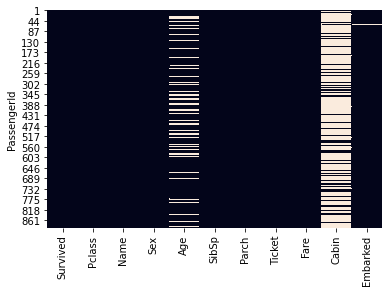

In [6]:
sns.heatmap(df.isna(), cbar = False)

In [7]:
# explore all unique values of all columns
if False:
    for column_name in df:
        if column_name not in ['Name']:
            print('Column "{}" has values {}'.format(column_name, df[column_name].unique()))

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

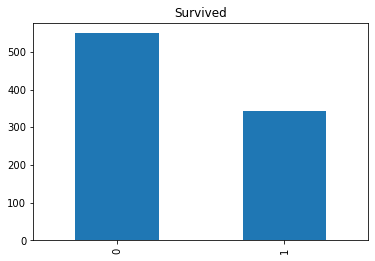

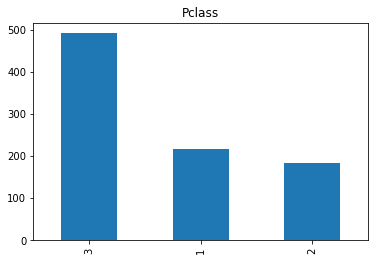

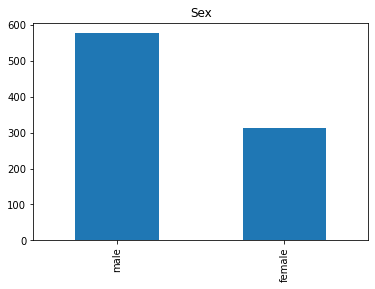

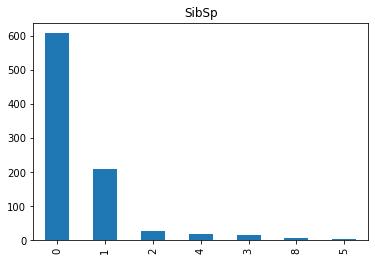

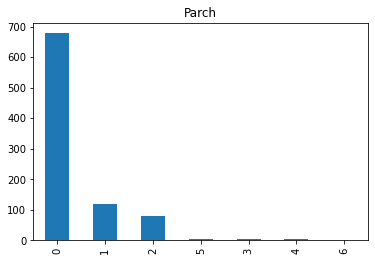

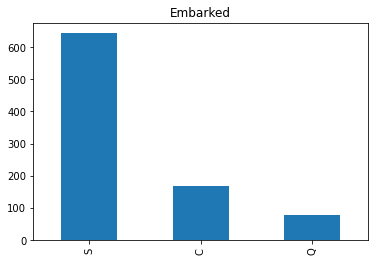

In [9]:
# plot histogram 
max_num_of_classes = 30

for column_name in df:
    if len(df[column_name].unique()) < max_num_of_classes:
        ax = df[column_name].value_counts().plot(kind='bar')
        ax.set_title(str(column_name))
        plt.show()

In [10]:
# convert the one-hot-encoded data back to string-categories with:
df['Survived'] = df['Survived'].map({0:'No', 1:'Yes'})

## Step 2

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [11]:
df['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Count')

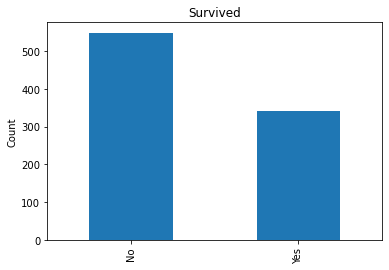

In [12]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survived')
plt.ylabel('Count')

## Step 3

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [13]:
firstclass_df = df.loc[ df['Pclass'].eq(1) ]
survivals_in_firstclass = firstclass_df['Survived'].value_counts()['Yes']
survival_proportion = survivals_in_firstclass / len(firstclass_df['Survived'])
print( '{} first class passengers survived. That is {}% of all first class passengers.'.format(survivals_in_firstclass, round(survival_proportion*100,2)) )

136 first class passengers survived. That is 62.96% of all first class passengers.


## Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [14]:
sns.set_style('white')

In [15]:
subset = pd.DataFrame( df[['Pclass', 'Sex']] )
subset['Count'] = 0 # add column for count-results
counts = subset.groupby(by=['Pclass', 'Sex']).count()
counts.reset_index(inplace=True)

In [16]:
counts

,Pclass,Sex,Count
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


For color stuff see
* https://stackoverflow.com/a/46174007
* https://matplotlib.org/stable/gallery/color/named_colors.html

Text(0.5, 0, 'Passenger Class')

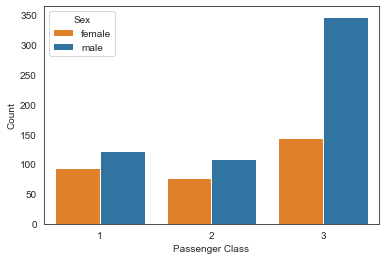

In [17]:
ax = sns.barplot( data=counts, x='Pclass', y='Count', hue='Sex'
                , palette={'male':'tab:blue', 'female':'tab:orange'})
ax.set_xlabel('Passenger Class')

Simpler soulution possible with countplot: `sns.countplot(x='Pclass', hue='Sex', data=df)`

## Step 5
Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

Text(0.5, 1.0, 'Layered Histograms')

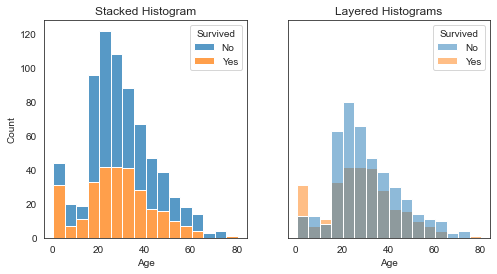

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,4))

sns.histplot(ax=ax1
            ,data=df
            ,x='Age'
            ,binwidth=5
            ,hue='Survived'
            ,multiple='stack')
ax1.set_title('Stacked Histogram')

sns.histplot(ax=ax2
            ,data=df
            ,x='Age'
            ,binwidth=5
            ,hue='Survived')
ax2.set_title('Layered Histograms')

## Step 6
Calculate the average age for survived and drowned passengers separately.

In [19]:
df.loc[df['Survived'].eq('Yes'), 'Age'].mean()

28.343689655172415

In [20]:
df.loc[df['Survived'].eq('No'), 'Age'].mean()

30.62617924528302

## Step 7
Replace missing age values by the mean age.

In [21]:
avg_age = df['Age'].mean()
print("The average age of all passengers with known age is", avg_age)
df.loc[df['Age'].isna(), 'Age'] = avg_age # alternative solution: df['Age'].fillna(avg_age)

The average age of all passengers with known age is 29.69911764705882


## Step 8
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [22]:
subset = pd.DataFrame( df[['Pclass', 'Survived', 'Sex']] )
subset['Count'] = 0 # add column for count-results
counts = subset.groupby(by=['Pclass', 'Sex', 'Survived']).count()
counts

Count
Pclass Sex    Survived       
1      female No            3
              Yes          91
       male   No           77
              Yes          45
2      female No            6
              Yes          70
       male   No           91
              Yes          17
3      female No           72
              Yes          72
       male   No          300
              Yes          47